O objetivo desta análise é prever a quantidade de consumo de cerveja em litros em São Paulo.



# Primeiros passos:

In [1]:
#Importando as bibliotecas necessárias

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
#Conjunto de dados

df = pd.read_csv('Consumo_cerveja.csv')

In [6]:
#Verificando o tamanho do conjunto de dados

df.shape

(941, 7)

O conjunto de dados possui 941 linhas e 7 colunas.

## Remoção da Variável Data:


Neste trabalho, a variável Data não será utilizada, portanto decidi excluir ela do conjunto de dados

In [7]:
#Exclusão da Variável

df = df.drop(['Data'], axis=1)

In [8]:
#Verificação do dataframe em relação a exclusão

df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,"27,3","23,9","32,5",0,0.0,25.461
1,"27,02","24,5","33,5",0,0.0,28.972
2,"24,82","22,4","29,9",0,1.0,30.814
3,"23,98","21,5","28,6","1,2",1.0,29.799
4,"23,82",21,"28,3",0,0.0,28.900


## Transformando o tipo das variáveis


In [9]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',' ,'.').astype(float)

df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',' ,'.').astype(float)

df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',' ,'.').astype(float)

df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',' ,'.').astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6)
memory usage: 44.2 KB


## Valores nulos

In [11]:
#Quantidade de valores nulos

df.isna().sum()

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [13]:
#Retirando os valores nulos para que não haja influência na análise

df = df.dropna()

#Verificação dos valores nulos

df.isna().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [14]:
#Após a remoção dos valores nulos. Vamos verificar o tamanho do conjunto de dados.

df.shape

(365, 6)

Agora possuímos 365 linhas e 6 colunas.

## Nova Coluna: Choveu?

Adicionando uma coluna baseada na variável Precipitação na qual 1 significa que choveu e 0 significa que não choveu naquele dia, para melhor manipulação dos dados.


In [15]:
#Choveu? 1-sim 0-não

df['Choveu?'] = df['Precipitacao (mm)'].apply(lambda x: 1.0 if x > 0 else 0.0)

In [16]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Choveu?
0,27.30,23.9,32.5,0.0,0.0,25.461,0.0
1,27.02,24.5,33.5,0.0,0.0,28.972,0.0
2,24.82,22.4,29.9,0.0,1.0,30.814,0.0
3,23.98,21.5,28.6,1.2,1.0,29.799,1.0
4,23.82,21.0,28.3,0.0,0.0,28.900,0.0


# Análise Exploratória de Dados

##Estatísticas

In [17]:
#Observando a contagem, média, desvio padrão, mínimo, 25%,50%, 75% e máximo.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperatura Media (C),365.0,21.226356,3.180108,12.900,19.020,21.380,23.280,28.860
Temperatura Minima (C),365.0,17.461370,2.826185,10.600,15.300,17.900,19.600,24.500
Temperatura Maxima (C),365.0,26.611507,4.317366,14.500,23.800,26.900,29.400,36.500
Precipitacao (mm),365.0,5.196712,12.417844,0.000,0.000,0.000,3.200,94.800
Final de Semana,365.0,0.284932,0.452001,0.000,0.000,0.000,1.000,1.000
Consumo de cerveja (litros),365.0,25.401367,4.399143,14.343,22.008,24.867,28.631,37.937
Choveu?,365.0,0.402740,0.491122,0.000,0.000,0.000,1.000,1.000


## Algumas observações


### As pessoas bebem mais no final de semana ou dia de semana?

In [18]:
df['Consumo de cerveja (litros)'].groupby(df['Final de Semana']).agg('mean')


Final de Semana
0.0    23.998222
1.0    28.922721
Name: Consumo de cerveja (litros), dtype: float64

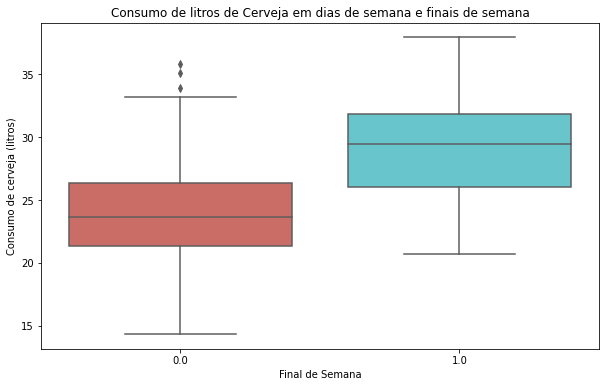

In [25]:
x = 'Final de Semana'
y = 'Consumo de cerveja (litros)'

plt.figure(figsize = (10,6))

boxplot = sns.boxplot(x=x,y=y,data=df,palette='hls')

boxplot.set_title('Consumo de litros de Cerveja em dias de semana e finais de semana')

plt.show()

O consumo médio de cerveja é maior nos finais de semana.

Nos dias de semana, 50% dos dados estão mais ou menos entre 20 e 27 litros de cerveja. Já nos finais de semana, 50% dos dados estão entre 25 e 33 litros.

Além disso, por meio deste gráfico, pode-se perceber que existem três outliers nos dias de semana. 

No código abaixo vou verificar esses outliers.

In [26]:
(df[(df['Final de Semana'] == 0.0) & (df['Consumo de cerveja (litros)'] > 33.5)])

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Choveu?
19,27.68,23.3,35.6,0.6,0.0,35.127,1.0
259,27.26,20.4,33.0,0.0,0.0,33.930,0.0
287,28.12,18.9,35.8,0.0,0.0,35.861,0.0


### Qual a média do consumo de cerveja em dias que chovem e em dias que não chovem? E fim de semana e dia de semana que chovem e não chovem?

In [27]:
df['Consumo de cerveja (litros)'].groupby(df['Choveu?']).agg('mean')

Choveu?
0.0    25.929757
1.0    24.617769
Name: Consumo de cerveja (litros), dtype: float64

Em dias que choveu, a média do consumo foi menor que nos dias que não choveu.

Média do consumo em dias da semana e em finais de semana que estão chovendo e que não estão chovendo:

In [28]:
consumo_chuva = pd.pivot_table(df,
                       columns = 'Final de Semana',
                       index = 'Choveu?',
                       values = 'Consumo de cerveja (litros)',
                       aggfunc = 'mean')

consumo_chuva

Final de Semana,0.0,1.0
Choveu?,,
0.0,24.495261,29.621820
1.0,23.247885,27.930977


Tanto nos dias de semana como nos finais de semana, nos dias chuvosos o consumo médio de cerveja é menor.

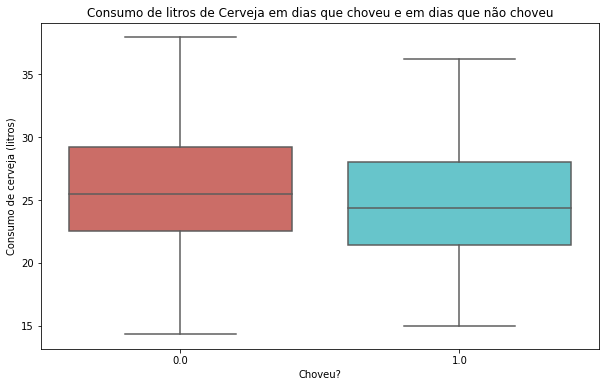

In [30]:
x = 'Choveu?'
y = 'Consumo de cerveja (litros)'

plt.figure(figsize = (10,6))

boxplot = sns.boxplot(x=x,y=y,data=df,palette='hls')

boxplot.set_title('Consumo de litros de Cerveja em dias que choveu e em dias que não choveu')

plt.show()

Em dias que não choveu, pode-se perceber que o consumo foi maior que nos dias que choveu.

Relação linear do consumo de cerveja em dias de semana e finais de semana que está chovendo.

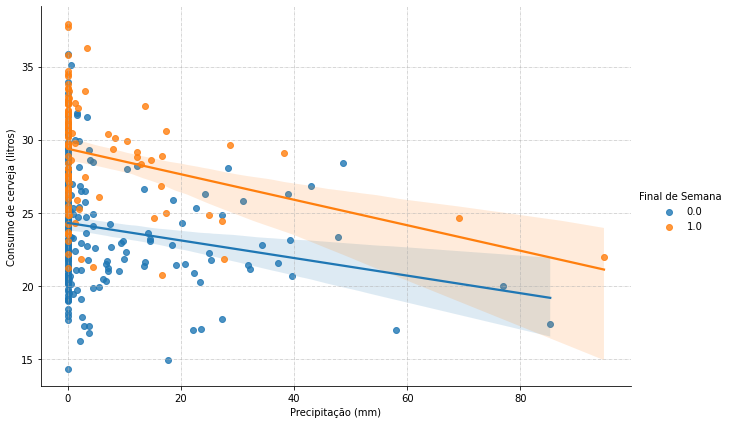

In [29]:
sns.lmplot(x='Precipitacao (mm)', y='Consumo de cerveja (litros)', hue='Final de Semana',
           data=df, aspect=1.5, height=6);

plt.xlabel('Precipitação (mm)')
plt.ylabel('Consumo de cerveja (litros)')
plt.grid(ls='-.', lw=.5);

A relação da precipitação (mm) com o consumo de cerveja é negativa, ou seja, quanto maior a precipitação (mm), menor será o consumo de cerveja. Por meio deste gráfico de dispersão, é possível perceber que nos finais de semana, apesar da relação também ser negativa, o consumo é maior que nos dias de semana.

# Correlação das Variáveis

In [31]:
df.corr(method = 'pearson')

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Choveu?
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615,-0.012409
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509,0.155332
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672,-0.138883
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784,0.510326
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981,0.013800
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000,-0.146471
Choveu?,-0.012409,0.155332,-0.138883,0.510326,0.013800,-0.146471,1.000000


Por meio dessa tabela de correlação é possível perceber que a variável a qual tem a correlação mais forte com o Consumo de cerveja (litros) é a Temperatura Máxima (C). Mas pode-se perceber também que as variáveis de temperatura têm uma correlação alta entre elas, fator que pode afetar no modelo, pois recomenda-se que as variáveis não tenham forte correlação entre elas, somente com a variável dependente (y).

## Consumo de Cerveja X Temperatura Média

Verificando a relação de consumo de cerveja com a temperatura está média por meio de um gráfico de dispersão:

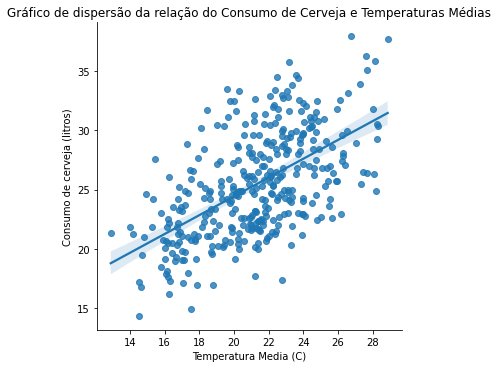

In [32]:
sns.lmplot(x = "Temperatura Media (C)", y = "Consumo de cerveja (litros)", data = df)
plt.title("Gráfico de dispersão da relação do Consumo de Cerveja e Temperaturas Médias")
plt.show()

Conforme verificado pelo coeficiente de correlação, a relação entre o consumo de cerveja e a temperatura média é positiva, ou seja, conforme a temperatura média aumenta, o consumo de cerveja também aumenta. O coeficiente foi de 0.57, podendo ser considerada uma correlação moderada.

## Consumo de Cerveja X Temperaturas Máximas

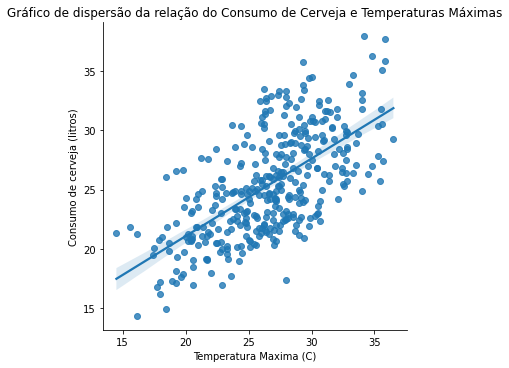

In [33]:
sns.lmplot(x = "Temperatura Maxima (C)", y = "Consumo de cerveja (litros)", data = df)
plt.title("Gráfico de dispersão da relação do Consumo de Cerveja e Temperaturas Máximas")
plt.show()

Aqui a relação também é positiva, conforme a temperatura máxima aumenta, o consumo de cerveja também aumenta. Além disso, o coeficiente de correlação foi de 0.64, podendo ser considerada uma correlação moderada entre as variáveis.

## Consumo de Cerveja X Temperaturas Mínimas

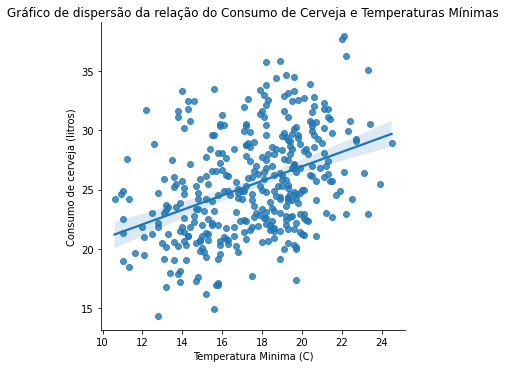

In [34]:
sns.lmplot(x = "Temperatura Minima (C)", y = "Consumo de cerveja (litros)", data = df)
plt.title("Gráfico de dispersão da relação do Consumo de Cerveja e Temperaturas Mínimas")
plt.show()

Apesar da relação entre as duas variáveis ser positiva, pode-se perceber que os dados estão bastante dispersos. O coeficiente de correlação dessas duas variáveis foi de 0.39, ou seja, apesar de ser uma relação positiva, trata-se de uma correlação baixa entre as variáveis.

# Aplicando o Modelo de Regressão Linear Múltipla

## Modelo 1

In [36]:
# x do modelo

x = df.drop('Consumo de cerveja (litros)',axis=1)

# y do modelo

y = df['Consumo de cerveja (litros)']

In [37]:
#Dividindo o conjuntos de dados em base de treino e de teste. 75% será para treino e 25% para teste:

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.25,random_state=42)

In [38]:
#Verificando os tamanhos dos conjuntos de dados de treino e teste

print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(273, 6) (273,)
(92, 6) (92,)


In [39]:
#Treinando o Modelo de Regressão Linear Múltipla:

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.18927666, -0.12450782,  0.58663292, -0.05800596,  5.16444987,
        0.37681088])

Verificando os pesos das variáveis no modelo:

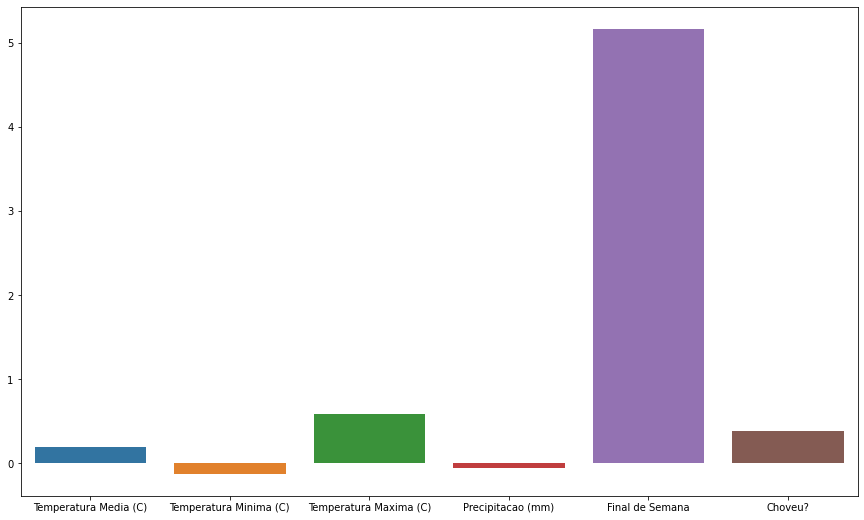

In [40]:
plt.figure(figsize=(15,9))
sns.barplot(x = x_train.columns,y = lr.coef_)
plt.show()

Pode-se perceber que a variável que tem o maior peso sobre a variável resposta é Final de Semana, ou seja, a variação entre dia de semana e final de semana influencia muito o consumo de cerveja. Além disso, as variáveis Temperatura Mínima (C) e Precipitação (mm) têm um peso negativo sobre a variável y.

In [41]:
#Verificando a Média dos Erros ao Quadrado

y_pred = lr.predict(x_test)

mean_squared_error(y_test,y_pred)

5.7536903080703015

In [42]:
#Raiz quadrada aplicada à Média dos Erros ao Quadrado, para trazer a métrica para a mesma magnitude do eixo y.

np.sqrt(mean_squared_error(y_test,y_pred))

2.3986851206588793

Tendo em vista que a média do consumo de cerveja é de 25.40 litros, pode-se considerar que o erro é aceitável. O modelo está errando 2.39 litros para cima e para baixo.

In [43]:
# Verificando o coeficiente de determinação (R²) do modelo:

lr.score(x_test,y_test)

0.7446236565419468

Por meio do coeficiente de determinação, pode-se dizer que aproximadamente 74% do modelo explica o consumo de cerveja.

In [44]:
#Verificando o modelo no conjunto de dados de treino

y_pred_train = lr.predict(x_train)
print(mean_squared_error(y_train,y_pred_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(lr.score(x_train,y_train))

5.233514969664927
2.2876876905873598
0.7085589493630273


Analisando o conjunto de dados de treino, pode-se perceber que o modelo explica 70% da variação do consumo de cerveja, o R² foi menor que no conjunto de dados de teste.

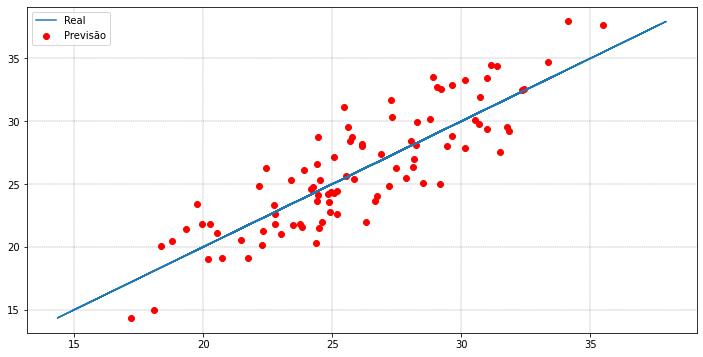

In [45]:
#Plotando os erros do modelo

def graficos(y, pred):
    
    plt.figure(figsize=(12, 6))

    plt.plot(y,y)
    plt.scatter(pred,y, c='r', marker='o')
    plt.legend(['Real','Previsão'])
    plt.grid(ls='-.', lw=0.2, c='k');

graficos(y_test, y_pred)

## Modelo 2

Tendo em vista que a variável Temperatura Mínima (C) tem uma correlação alta com Temperatura Média (C), e que Precipitação (mm) tem uma correlação alta com a variável que verifica se choveu, decidiu-se por aplicar outro modelo neste dataset, desta vez excluindo as variáveis Temperatura Mínima (C), Temperatura Média (C) e Choveu?.

In [46]:
#Definindo o x do modelo

x = df.drop(['Consumo de cerveja (litros)', 'Temperatura Media (C)', 'Temperatura Minima (C)','Choveu?'], axis=1)

In [47]:
#Definindo o y do modelo

y = df['Consumo de cerveja (litros)']

In [48]:
#Dividindo o dataset em treino e teste

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.25,random_state=42)

In [49]:
#Aplicando o Modelo de Regressão Linear Múltipla

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.65295463, -0.05081594,  5.18612642])

In [50]:
#Verificando a Média dos Erros ao Quadrado

y_pred = lr.predict(x_test)

mean_squared_error(y_test,y_pred)

5.652562093305644

In [51]:
#Aplicando a raiz quadrada na Média dos Erros ao Quadrado

np.sqrt(mean_squared_error(y_test,y_pred))

2.3775117440941576

A diferença entre os dois modelos foi muito baixa, mesmo excluindo as variáveis que têm alta colinearidade.

In [ ]:
#Verificando o coeficiente de determinação do modelo

In [52]:
lr.score(x_test,y_test)

0.749112211247579

Assim como o primeiro modelo, este explica, aproximadamente, 74% do consumo de cerveja.

In [53]:
#Avaliação no treino

y_pred_train = lr.predict(x_train)
print(mean_squared_error(y_train,y_pred_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(lr.score(x_train,y_train))

5.2697243466481245
2.295588017621656
0.7065425418563973


# **CONCLUSÕES**

Analisando o dataset, foi possível perceber que o 

*   Analisando o dataset, foi possível perceber que o consumo médio de cerveja é maior nos finais de semana.

*   Além disso, em dias que chovem o consumo médio de cerveja foi menor, tanto nos dias de semana quanto nos finais de semana. Precipitação (mm) tem uma relação linear negativa com a variável target, ou seja, quanto maior a precipitação, menor será o consumo de cerveja.

* Além disso, em dias que chovem o consumo médio de cerveja foi menor, tanto nos dias de semana quanto nos finais de semana. Precipitação (mm) tem uma relação linear negativa com a variável target, ou seja, quanto maior a precipitação, menor será o consumo de cerveja.

* Ainda, por meio da tabela gerada das correlações entre as variáveis explicativas e a variável resposta, foi possível perceber que a correlação mais forte com a variável y – Consumo de Cerveja – foi a variável Temperatura Máxima. Porém, percebeu-se também que as variáveis de temperatura tinham uma correlação forte entre elas, e é importante mencionar que a colinearidade (alta correlação entre as variáveis explicativas) não é interessante para um modelo de regressão linear, pois ele pode ficar enviesado.

* Ao aplicar o modelo de regressão linear múltipla, foi possível perceber que a variável que possuía maior peso dentro do modelo era a variável Final de Semana.

* Decidimos treinar o modelo duas vezes: na primeira considerando todas as variáveis explicativas e na segunda, desconsiderando as variáveis explicativas que possuíam alta colinearidade. Nos dois modelos, o erro foi muito próximo, de aproximadamente 2,39 litros para cima e para baixo. Vale mencionar que, em razão da média do consumo de cerveja ser de 25,4 litros, um erro de 2,39 é considerado baixo.

* Por fim, é importante mencionar que nos dois modelos o coeficiente de determinação – coeficiente que informa o quanto que x está explicando a variação de y – foi de 74%, ou seja, os modelos explicam 74% da variação do consumo de cerveja.